In [ ]:
# convert real gexp to uint8 on front end
# Next: run on dense-layer VAE output

In [2]:
import umap
import glob as glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
all_files = sorted(glob.glob(
    '../gexp_files/*.tsv'))

In [4]:
raw_gexp = pd.read_csv(all_files[2],sep='\t',index_col = 0)

In [5]:
raw_gexp.head(2)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.0,16.3640,12.932,52.150,408.08,0,1187.00,0.0000,0.0000,...,129.590,1007.80,1658.5,258.49,1208.40,3507.2,1894.9,1180.50,1.7233,0.0
TCGA-3C-AALI,BRCA_4,0.0,9.2659,17.379,69.755,563.89,0,516.04,1.0875,0.5438,...,59.815,448.61,1343.1,198.48,603.59,5504.6,1318.7,406.74,926.5900,0.0


In [6]:
raw_gexp.shape

(995, 20532)

In [66]:
# iloc absolute vs named position? reset index from version 00
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 1 ]

In [ ]:
index_pos_list # this is the index positions of BRCA_1

In [7]:
# import 4D latent space object from tabular converted image VAE
decoded = pd.read_csv('synth_TCGA/decoded/decoded_4D_sample_averaging.tsv',
                      sep = '\t',
                      index_col = 0)

In [8]:
decoded.head(2) # Extra columns are close to zero

,Label,0,1,2,3,4,5,6,7,8,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,BRCA_1,0.174624,0.138289,0.045083,0.330447,0.512801,0.049917,0.490741,0.044853,0.059693,...,0.00081,0.000686,0.000506,0.000278,0.001446,0.000446,0.000868,0.000251,0.004089,0.000737
1,BRCA_1,0.217250,0.184895,0.071528,0.364796,0.505413,0.086212,0.488446,0.082946,0.098834,...,0.00233,0.002423,0.001724,0.000860,0.003488,0.001447,0.002842,0.000987,0.009050,0.002272


In [9]:
decoded.shape

(10000, 20737)

In [10]:
# Important, keep labels for now on four synth sub components
start_col = 0

In [11]:
sb_typ = 'BRCA_1'

In [12]:
# What is this doing? subset 10k decoded samples by subtype, sample same count as real
# drops the y target Label column while somehow using it to do the subsetting
# drop the zero fill columns to complete perfect square in conv2D wrap
brca1 = decoded[decoded.Label == sb_typ].iloc[:,start_col:20532].sample(len(raw_gexp[raw_gexp.Labels == sb_typ]))
# confusing because colulmn index starts with 0 in position 1 as construction artifact

In [13]:
brca1

,Label,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
966,BRCA_1,0.109362,0.078788,0.017081,0.271265,0.527174,0.020054,0.508395,0.018343,0.026792,...,0.176813,0.529041,0.489376,0.242071,0.483899,0.552424,0.511331,0.519629,0.341785,0.000044
140,BRCA_1,0.152085,0.119919,0.035304,0.312124,0.533742,0.041626,0.516325,0.038267,0.045779,...,0.302473,0.536234,0.515642,0.303702,0.515290,0.527347,0.514672,0.516589,0.324678,0.000251
1882,BRCA_1,0.153451,0.123505,0.035039,0.319658,0.515148,0.043544,0.494356,0.040987,0.050872,...,0.303505,0.516569,0.508786,0.313336,0.515408,0.521235,0.533559,0.526825,0.344888,0.000267
2372,BRCA_1,0.164994,0.129916,0.039101,0.321812,0.516148,0.049080,0.506371,0.049663,0.066055,...,0.246874,0.507419,0.495247,0.283830,0.494091,0.534107,0.538262,0.528750,0.449634,0.000446
873,BRCA_1,0.118674,0.092391,0.021309,0.288804,0.533334,0.027703,0.511766,0.025984,0.031176,...,0.325611,0.527513,0.521727,0.276137,0.518242,0.506209,0.529861,0.524778,0.310643,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,BRCA_1,0.121548,0.093841,0.021292,0.296030,0.511919,0.026419,0.477674,0.023654,0.032505,...,0.237875,0.513723,0.494420,0.291122,0.505766,0.532849,0.530302,0.528416,0.305664,0.000071
1839,BRCA_1,0.163040,0.127500,0.039333,0.316575,0.533134,0.048247,0.525506,0.047794,0.060031,...,0.271885,0.524020,0.509162,0.280147,0.499645,0.530737,0.525885,0.521953,0.424027,0.000417
1483,BRCA_1,0.165978,0.132333,0.042088,0.322382,0.530774,0.048980,0.514682,0.045261,0.054136,...,0.301420,0.534398,0.513341,0.314399,0.514808,0.530874,0.515045,0.516348,0.338486,0.000406
1482,BRCA_1,0.241833,0.205634,0.092594,0.373687,0.517604,0.100948,0.502401,0.092652,0.105905,...,0.330348,0.530463,0.505635,0.384852,0.523524,0.541122,0.513732,0.512037,0.356460,0.003364


In [14]:
sb_typ = 'BRCA_2'
brca2 = decoded[decoded.Label == sb_typ].iloc[:,start_col:20532].sample(len(raw_gexp[raw_gexp.Labels == sb_typ]))

In [15]:
sb_typ = 'BRCA_3'
brca3 = decoded[decoded.Label == sb_typ].iloc[:,start_col:20532].sample(len(raw_gexp[raw_gexp.Labels == sb_typ]))

In [16]:
sb_typ = 'BRCA_4'
brca4 = decoded[decoded.Label == sb_typ].iloc[:,start_col:20532].sample(len(raw_gexp[raw_gexp.Labels == sb_typ]))

In [ ]:
# another problem, has added columns for zero-out
# it seems ok tho, recon vals here are pretty small (last couple hund cols)

In [17]:
del(decoded)

In [18]:
decoded_stack = pd.concat([brca1,
                          brca2,
                          brca3,
                          brca4])

In [19]:
new_lables = []
for i in decoded_stack.Label:
    if i == 'BRCA_1':
        new_lables.append('BRCA_5')
    if i == 'BRCA_2':
        new_lables.append('BRCA_6')
    if i == 'BRCA_3':
        new_lables.append('BRCA_7')
    if i == 'BRCA_4':
        new_lables.append('BRCA_8')        

In [20]:
decoded_stack.Label = new_lables

In [21]:
decoded_stack.columns = raw_gexp.columns

In [22]:
decoded_stack.head(1) # random sampling from each subtype

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
966,BRCA_5,0.109362,0.078788,0.017081,0.271265,0.527174,0.020054,0.508395,0.018343,0.026792,...,0.176813,0.529041,0.489376,0.242071,0.483899,0.552424,0.511331,0.519629,0.341785,0.000044


In [23]:
type(raw_gexp.iloc[0, 1])

numpy.float64

In [26]:
import numpy

In [34]:
raw_uint8 = raw_gexp.iloc[:, 1:].astype(numpy.uint8)

In [36]:
raw_uint8 = raw_uint8 / 255

In [37]:
raw_uint8.insert(0, 'Labels', raw_gexp.Labels)

/Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [38]:
raw_uint8

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.0,0.062745,0.047059,0.203922,0.596078,0.0,0.639216,0.000000,0.0,...,0.505882,0.937255,0.478431,0.007843,0.721569,0.701961,0.400000,0.611765,0.003922,0.0
TCGA-3C-AALI,BRCA_4,0.0,0.035294,0.066667,0.270588,0.200000,0.0,0.015686,0.003922,0.0,...,0.231373,0.752941,0.247059,0.776471,0.356863,0.501961,0.149020,0.588235,0.619608,0.0
TCGA-3C-AALJ,BRCA_2,0.0,0.043137,0.035294,0.603922,0.313725,0.0,0.313725,0.000000,0.0,...,0.137255,0.086275,0.000000,0.294118,0.078431,0.321569,0.682353,0.992157,0.137255,0.0
TCGA-3C-AALK,BRCA_1,0.0,0.047059,0.043137,0.560784,0.380392,0.0,0.156863,0.000000,0.0,...,0.215686,0.709804,0.372549,0.686275,0.372549,0.231373,0.050980,0.737255,0.258824,0.0
TCGA-4H-AAAK,BRCA_1,0.0,0.023529,0.054902,0.329412,0.996078,0.0,0.015686,0.000000,0.0,...,0.188235,0.658824,0.098039,0.054902,0.027451,0.788235,0.247059,0.443137,0.733333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.0,0.000000,0.011765,0.164706,0.333333,0.0,0.752941,0.015686,0.0,...,0.094118,0.952941,0.015686,0.384314,0.231373,0.725490,0.125490,0.733333,0.831373,0.0
TCGA-XX-A899,BRCA_1,0.0,0.054902,0.082353,0.537255,0.549020,0.0,0.670588,0.007843,0.0,...,0.274510,0.513725,0.949020,0.082353,0.690196,0.996078,0.552941,0.619608,0.384314,0.0
TCGA-XX-A89A,BRCA_1,0.0,0.086275,0.105882,0.250980,0.823529,0.0,0.470588,0.000000,0.0,...,0.188235,0.333333,0.372549,0.643137,0.917647,0.396078,0.615686,0.725490,0.921569,0.0


In [ ]:
# convert the labels to 5,6,7,8 for synth color mapping - done
    # future upgrade: chage naming scheme to BRCA_1_synth, etc.
# combine raw_gexp with decoded stack
# run the num_list helper function

In [39]:
full_stack = pd.concat([raw_uint8,
                       decoded_stack])

In [40]:
full_stack 

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
TCGA-3C-AAAU,BRCA_1,0.000000,0.062745,0.047059,0.203922,0.596078,0.000000,0.639216,0.000000,0.000000,...,0.505882,0.937255,0.478431,0.007843,0.721569,0.701961,0.400000,0.611765,0.003922,0.000000
TCGA-3C-AALI,BRCA_4,0.000000,0.035294,0.066667,0.270588,0.200000,0.000000,0.015686,0.003922,0.000000,...,0.231373,0.752941,0.247059,0.776471,0.356863,0.501961,0.149020,0.588235,0.619608,0.000000
TCGA-3C-AALJ,BRCA_2,0.000000,0.043137,0.035294,0.603922,0.313725,0.000000,0.313725,0.000000,0.000000,...,0.137255,0.086275,0.000000,0.294118,0.078431,0.321569,0.682353,0.992157,0.137255,0.000000
TCGA-3C-AALK,BRCA_1,0.000000,0.047059,0.043137,0.560784,0.380392,0.000000,0.156863,0.000000,0.000000,...,0.215686,0.709804,0.372549,0.686275,0.372549,0.231373,0.050980,0.737255,0.258824,0.000000
TCGA-4H-AAAK,BRCA_1,0.000000,0.023529,0.054902,0.329412,0.996078,0.000000,0.015686,0.000000,0.000000,...,0.188235,0.658824,0.098039,0.054902,0.027451,0.788235,0.247059,0.443137,0.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,BRCA_8,0.204596,0.171926,0.063123,0.358978,0.503259,0.073315,0.477702,0.067193,0.083077,...,0.300772,0.512075,0.494888,0.369215,0.519011,0.536614,0.530358,0.524094,0.350870,0.001240
8434,BRCA_8,0.131040,0.106598,0.024559,0.322527,0.490684,0.029297,0.422152,0.022990,0.032195,...,0.239017,0.503747,0.477917,0.370284,0.524762,0.540370,0.531491,0.530668,0.209724,0.000082
8200,BRCA_8,0.159626,0.132633,0.036982,0.345382,0.488012,0.041067,0.419784,0.031381,0.043425,...,0.231132,0.519074,0.476875,0.414113,0.524930,0.553277,0.521327,0.517982,0.200903,0.000228
9765,BRCA_8,0.161136,0.130649,0.037163,0.339939,0.491850,0.041033,0.432397,0.032610,0.046793,...,0.203798,0.524053,0.472680,0.385897,0.510074,0.561962,0.520740,0.514816,0.242285,0.000255


In [56]:
full_stack.reset_index(drop = True)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,BRCA_1,0.000000,0.062745,0.047059,0.203922,0.596078,0.000000,0.639216,0.000000,0.000000,...,0.505882,0.937255,0.478431,0.007843,0.721569,0.701961,0.400000,0.611765,0.003922,0.000000
1,BRCA_4,0.000000,0.035294,0.066667,0.270588,0.200000,0.000000,0.015686,0.003922,0.000000,...,0.231373,0.752941,0.247059,0.776471,0.356863,0.501961,0.149020,0.588235,0.619608,0.000000
2,BRCA_2,0.000000,0.043137,0.035294,0.603922,0.313725,0.000000,0.313725,0.000000,0.000000,...,0.137255,0.086275,0.000000,0.294118,0.078431,0.321569,0.682353,0.992157,0.137255,0.000000
3,BRCA_1,0.000000,0.047059,0.043137,0.560784,0.380392,0.000000,0.156863,0.000000,0.000000,...,0.215686,0.709804,0.372549,0.686275,0.372549,0.231373,0.050980,0.737255,0.258824,0.000000
4,BRCA_1,0.000000,0.023529,0.054902,0.329412,0.996078,0.000000,0.015686,0.000000,0.000000,...,0.188235,0.658824,0.098039,0.054902,0.027451,0.788235,0.247059,0.443137,0.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,BRCA_8,0.204596,0.171926,0.063123,0.358978,0.503259,0.073315,0.477702,0.067193,0.083077,...,0.300772,0.512075,0.494888,0.369215,0.519011,0.536614,0.530358,0.524094,0.350870,0.001240
1986,BRCA_8,0.131040,0.106598,0.024559,0.322527,0.490684,0.029297,0.422152,0.022990,0.032195,...,0.239017,0.503747,0.477917,0.370284,0.524762,0.540370,0.531491,0.530668,0.209724,0.000082
1987,BRCA_8,0.159626,0.132633,0.036982,0.345382,0.488012,0.041067,0.419784,0.031381,0.043425,...,0.231132,0.519074,0.476875,0.414113,0.524930,0.553277,0.521327,0.517982,0.200903,0.000228
1988,BRCA_8,0.161136,0.130649,0.037163,0.339939,0.491850,0.041033,0.432397,0.032610,0.046793,...,0.203798,0.524053,0.472680,0.385897,0.510074,0.561962,0.520740,0.514816,0.242285,0.000255


In [41]:
n_comps = 2

In [42]:
reducer = umap.UMAP(n_components = n_comps)

In [43]:
scaled_data = StandardScaler().fit_transform(full_stack.iloc[:,1:])

In [44]:
embedding = reducer.fit_transform(scaled_data)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [57]:
num_list = [] 
for i in full_stack.Labels:
    num = i.split('_')[1]
    num_list.append(int(num))

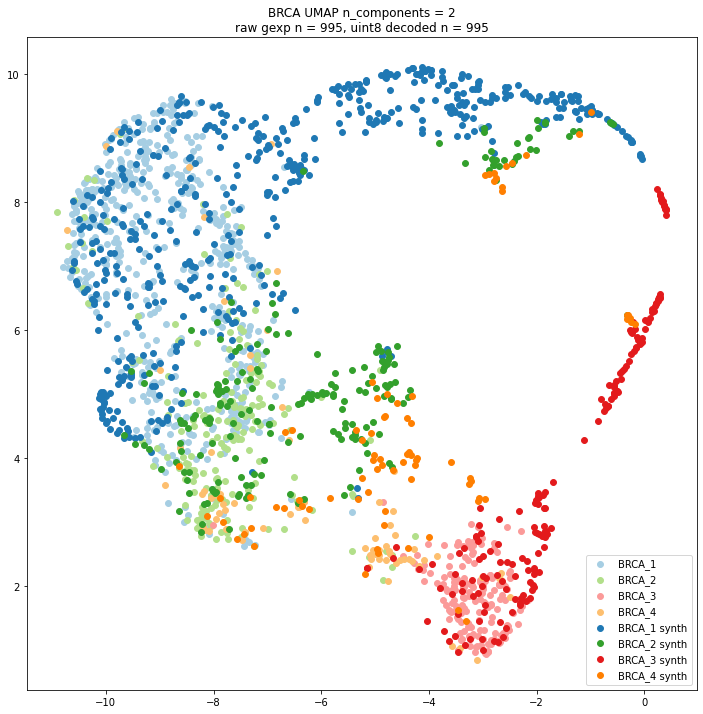

In [63]:
fsv = 1 # Full stack version
dot_size = 35

# UMAP with 2 components, raw BRCA n = 995
# scaled_data = StandardScaler().fit_transform(raw_gexp.iloc[:,1:])

# n_comps = 2
# reducer = umap.UMAP(n_components = n_comps)
# embedding = reducer.fit_transform(scaled_data)
fig = plt.figure(figsize = (12, 12))

index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 1 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(0),
           label = 'BRCA_1')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 2 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(2),
           label = 'BRCA_2')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 3 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(4),
           label = 'BRCA_3')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 4 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(6),
           label = 'BRCA_4')

index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 5 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(1),
           label = 'BRCA_1 synth')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 6 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(3),
           label = 'BRCA_2 synth')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 7 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(5),
           label = 'BRCA_3 synth')
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 8 ]
plt.scatter(embedding[index_pos_list,0], embedding[index_pos_list,1], s=dot_size, color=plt.cm.Paired(7),
           label = 'BRCA_4 synth')

plt.title('BRCA UMAP n_components = '+
          str(n_comps)+'\nraw gexp n = 995, uint8 decoded n = 995'
          # '\nscaler: standard, sk learn preprocessing'
         )
plt.legend(loc = 'lower right')
plt.savefig('UMAP_out/'+
            'BRCA'+'_UMAP_n_comps_'+
            str(n_comps)+'_2022-08-24_uint8_norm_'+str(fsv)+'.png')

In [ ]:
# End, begin feed of np.float64 to image VAE

In [59]:
plt.cm.Paired(0)

(0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1.0)

In [61]:
plt.cm.Paired(1)

(0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1.0)

In [ ]:
# end v00
# try converting raw data to uint8 on the front end
# then remove unit8 on image VAE feed

In [ ]:
fig = plt.figure()

In [ ]:
Original v00:

In [119]:
type(raw_gexp.iloc[0,1])

numpy.float64

numpy.float64 is the data type of the raw gene expression values
See histograms and heatmaps in slide deck, radically skewed with outliers

In [ ]:
decoded.iloc[:,1:].head(2)

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0.174624,0.138289,0.045083,0.330447,0.512801,0.049917,0.490741,0.044853,0.059693,0.120348,...,0.00081,0.000686,0.000506,0.000278,0.001446,0.000446,0.000868,0.000251,0.004089,0.000737
1,0.217250,0.184895,0.071528,0.364796,0.505413,0.086212,0.488446,0.082946,0.098834,0.172767,...,0.00233,0.002423,0.001724,0.000860,0.003488,0.001447,0.002842,0.000987,0.009050,0.002272


In [124]:
dcdd_flt = decoded.iloc[:,1:].astype(np.float64)
dcdd_flt.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0.174624,0.138289,0.045083,0.330447,0.512801,0.049917,0.490741,0.044853,0.059693,0.120348,...,0.00081,0.000686,0.000506,0.000278,0.001446,0.000446,0.000868,0.000251,0.004089,0.000737
1,0.217250,0.184895,0.071528,0.364796,0.505413,0.086212,0.488446,0.082946,0.098834,0.172767,...,0.00233,0.002423,0.001724,0.000860,0.003488,0.001447,0.002842,0.000987,0.009050,0.002272


In [ ]:
# convert raw data to uint8 - yes, this version, 01

In [ ]:
base = np.array(gene_row + (
            20736 - len(              # dimension of nearest perfect square   
                gene_row)) * [0],
                        dtype=np.uint8)

In [111]:
raw_gexp.iloc[:,1:]

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,0.0000,16.3640,12.9320,52.150,408.08,0,1187.00,0.0000,0.0000,0.0,...,129.590,1007.80,1658.50,258.490,1208.40,3507.2,1894.90,1180.50,1.7233,0.0000
TCGA-3C-AALI,0.0000,9.2659,17.3790,69.755,563.89,0,516.04,1.0875,0.5438,0.0,...,59.815,448.61,1343.10,198.480,603.59,5504.6,1318.70,406.74,926.5900,0.0000
TCGA-3C-AALJ,0.9066,11.6230,9.2294,154.300,1360.80,0,592.02,0.0000,0.0000,0.0,...,35.358,534.00,768.81,331.820,532.18,5458.8,942.88,509.52,35.3580,0.0000
TCGA-3C-AALK,0.0000,12.0890,11.0800,143.860,865.54,0,552.75,0.4137,0.0000,0.0,...,55.027,437.73,863.88,175.420,607.37,5691.4,781.13,700.87,66.6120,0.0000
TCGA-4H-AAAK,0.0000,6.8468,14.4300,84.213,766.38,0,260.85,0.4255,0.0000,0.0,...,48.936,424.25,1049.80,14.043,775.75,4041.7,831.91,881.70,187.2300,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,0.0000,0.0000,3.2580,42.264,1877.40,0,704.54,4.0725,0.0000,0.0,...,24.435,243.53,772.96,98.554,315.21,10937.0,800.65,443.09,724.9000,0.0000
TCGA-XX-A899,0.0000,14.3860,21.4410,137.780,652.76,0,427.17,2.7559,0.0000,0.0,...,70.866,643.70,1266.50,21.260,688.19,5118.1,1933.90,670.08,98.4250,0.0000
TCGA-XX-A89A,0.0000,22.3240,27.2740,64.143,722.72,0,376.48,0.4724,0.0000,0.0,...,48.654,341.52,1375.50,164.380,746.81,5477.6,1437.40,953.71,235.2400,0.9447


In [93]:
index_pos_list = [ i for i in range(len(num_list)) if num_list[i] == 1 ]

In [94]:
index_pos_list

[1,
 2,
 3,
 7,
 8,
 9,
 10,
 11,
 14,
 15,
 17,
 23,
 24,
 25,
 29,
 30,
 31,
 32,
 34,
 35,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 51,
 53,
 56,
 59,
 62,
 64,
 68,
 72,
 74,
 77,
 80,
 81,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 94,
 95,
 97,
 99,
 103,
 104,
 105,
 106,
 109,
 110,
 114,
 117,
 118,
 120,
 121,
 125,
 126,
 128,
 132,
 134,
 135,
 136,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 150,
 151,
 152,
 153,
 156,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 182,
 183,
 188,
 189,
 192,
 193,
 194,
 197,
 199,
 200,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 220,
 221,
 222,
 224,
 227,
 228,
 229,
 230,
 233,
 235,
 238,
 242,
 244,
 247,
 249,
 254,
 256,
 257,
 259,
 260,
 261,
 263,
 264,
 265,
 266,
 267,
 269,
 271,
 272,
 273,
 279,
 281,
 283,
 284,
 285,
 287,
 288,
 291,
 292,
 296,
 297,
 299,
 300,
 302,
 303,
 304,
 306,
 311,
 312,
 314,
 316,
 322,
 323,
 324,
 32